<a href="https://colab.research.google.com/github/bermudezfc/CCADMACL_FINAL_PROJ/blob/main/Advanced_ML_Finals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/bermudezfc/CCADMACL_FINAL_PROJ/refs/heads/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")


In [ ]:
df

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           1.0     0.0  ...            1.0   
1                       0.0           0.0     1.0  ...            1.0   
2                       0.0           1.0     1.0  ...            1.0   
3                       0.0           1.0     1.0  ...            1.0   
4                       0.0           1.0     1.0  ...            1.0   
...                     ...           ...     ...  ...            ...   
70687                   0.0           0.0     0.0  ...            1.0   
70688                   1.0           0.0     1.0  ...            1.0   
70689                   1.0           0.0     1.0  ...            1.0   
70690                   0.0           0.0     0.0  ...            1.0   
70691                   1.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0              0.0      3.0       5.0      30.0       0.0  1.0   4.0   
1              0.0      3.0       0.0       0.0       0.0  1.0  12.0   
2              0.0      1.0       0.0      10.0       0.0  1.0  13.0   
3              0.0      3.0       0.0       3.0       0.0  1.0  11.0   
4              0.0      2.0       0.0       0.0       0.0  0.0   8.0   
...            ...      ...       ...       ...       ...  ...   ...   
70687          0.0      4.0       0.0       0.0       0.0  0.0   6.0   
70688          0.0      2.0       0.0       0.0       1.0  1.0  10.0   
70689          0.0      5.0      15.0       0.0       1.0  0.0  13.0   
70690          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
70691          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

       Education  Income  
0            6.0     8.0  
1            6.0     8.0  
2            6.0     8.0  
3            6.0     8.0  
4            5.0     8.0  
...          ...     ...  
70687        4.0     1.0  
70688        3.0     6.0  
70689        6.0     4.0  
70690        2.0     4.0  
70691        6.0     2.0  

[70692 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

0 = no diabetes 1 = diabetes & prediabetes

In [ ]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

Scaling

In [ ]:
from sklearn.discriminant_analysis import StandardScaler

ds = df.copy()
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [ ]:
# scaled_ds = df.copy()

PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe()

col1          col2          col3
count  7.069200e+04  7.069200e+04  7.069200e+04
mean  -5.146238e-17 -7.076078e-17  2.372094e-17
std    1.976549e+00  1.343166e+00  1.155906e+00
min   -4.034951e+00 -7.971851e+00 -4.294874e+00
25%   -1.537784e+00 -7.279109e-01 -7.726190e-01
50%   -2.380423e-01  1.674571e-01  9.545221e-02
75%    1.318670e+00  9.506322e-01  8.636943e-01
max    7.046035e+00  3.470103e+00  3.854526e+00

In [ ]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC2_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC2_explainedvariance)

Explained variance of PC1 0.17757688159020135
Explained variance of PC2 0.0820031950031366
Explained variance of PC3 0.06073182752552012


Explained variance of PC1 0.17757688159020135
Explained variance of PC2 0.0820031950031366
Explained variance of PC2 0.06073182752552012


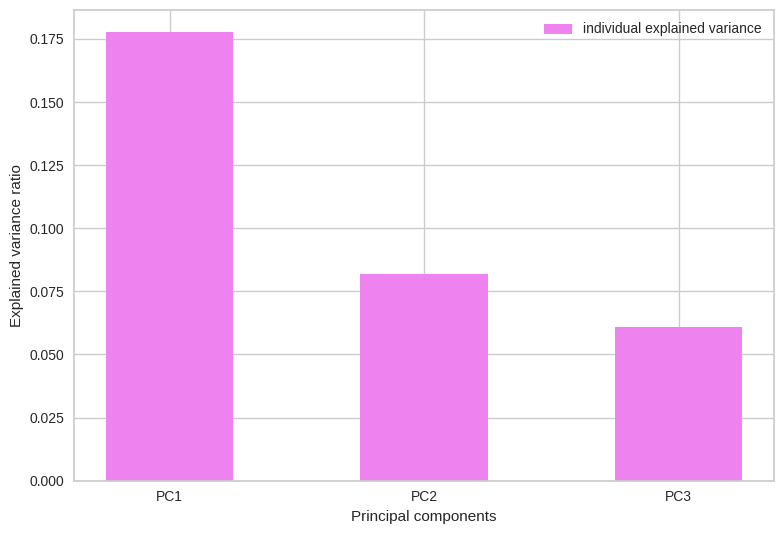

                           PC1       PC2       PC3
Diabetes_binary       0.578735  0.320391 -0.060621
HighBP                0.525264  0.402487 -0.078484
HighChol              0.410100  0.349425 -0.053248
CholCheck             0.106806  0.312731  0.099728
BMI                   0.391183 -0.004208 -0.041941
Smoker                0.252864  0.021749 -0.254119
Stroke                0.320725  0.101554  0.094475
HeartDiseaseorAttack  0.423671  0.255002 -0.005966
PhysActivity         -0.435773  0.128393  0.136205
Fruits               -0.167333  0.179644  0.617917
Veggies              -0.223469  0.141282  0.557445
HvyAlcoholConsump    -0.097469 -0.093591 -0.121037
AnyHealthcare        -0.046886  0.440220  0.159371
NoDocbcCost           0.231087 -0.483896  0.053295
GenHlth               0.772095 -0.080723  0.096526
MentHlth              0.401318 -0.408950  0.252742
PhysHlth              0.635917 -0.203879  0.282817
DiffWalk              0.675332 -0.075261  0.214245
Sex                  -0.044374 

In [ ]:
# put your answer here
import matplotlib.pyplot as plt
import numpy as np
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC2_explainedvariance = explained_variance[2]
print("Explained variance of PC2", PC2_explainedvariance)
plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=scaled_ds.columns)

print(loading_matrix)

Elbow Method to determine the number of clusters to be formed:


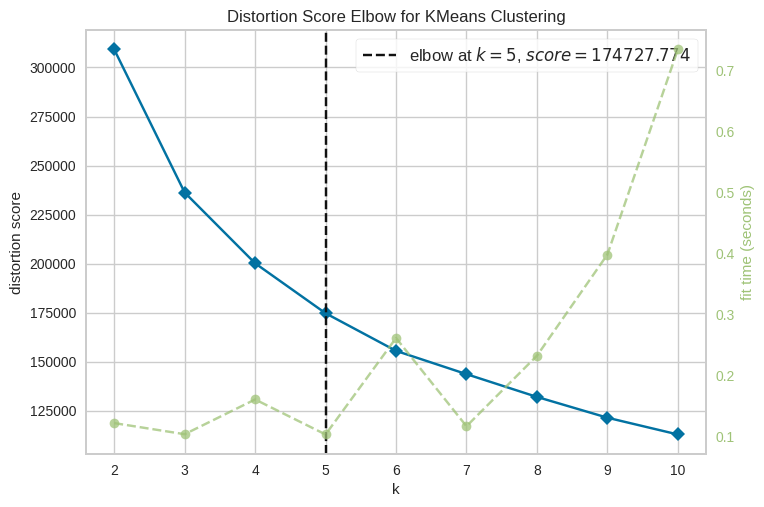

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# put your answer here
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

pca = PCA(n_components=3)
PCA_ds = pd.DataFrame(pca.fit_transform(scaled_ds), columns=(["col1","col2", "col3"]))

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans.fit(PCA_ds)
labels = kmeans.labels_
kmeans.inertia_

174733.00822967617

In [ ]:
PCA_ds["Cluster"] = labels

<Axes: xlabel='col1', ylabel='col2'>

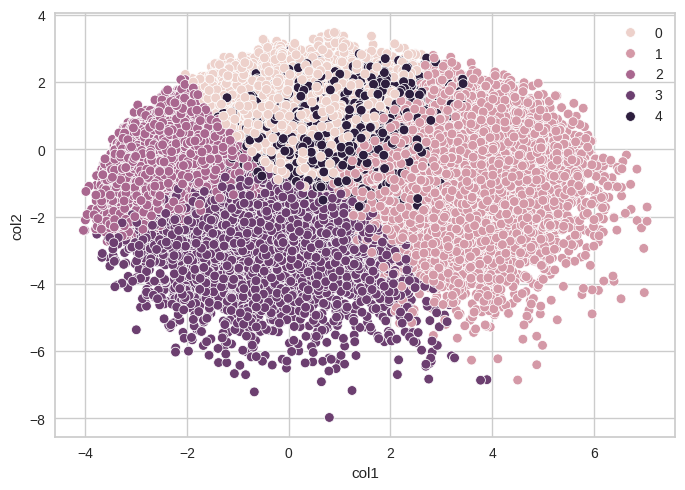

In [ ]:
# put your answer here
import seaborn as sns

sns.scatterplot(data = PCA_ds, x = 'col1', y = 'col2', hue = kmeans.labels_)

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(PCA_ds[['col1', 'col2']], PCA_ds['Cluster'])
print(f"Silhouette Score: {score}")


Silhouette Score: 0.22252691739634414


In [ ]:
kmeans= KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(PCA_ds)
PCA_ds["Clusters"]= y_kmeans
df["Clusters"]= y_kmeans

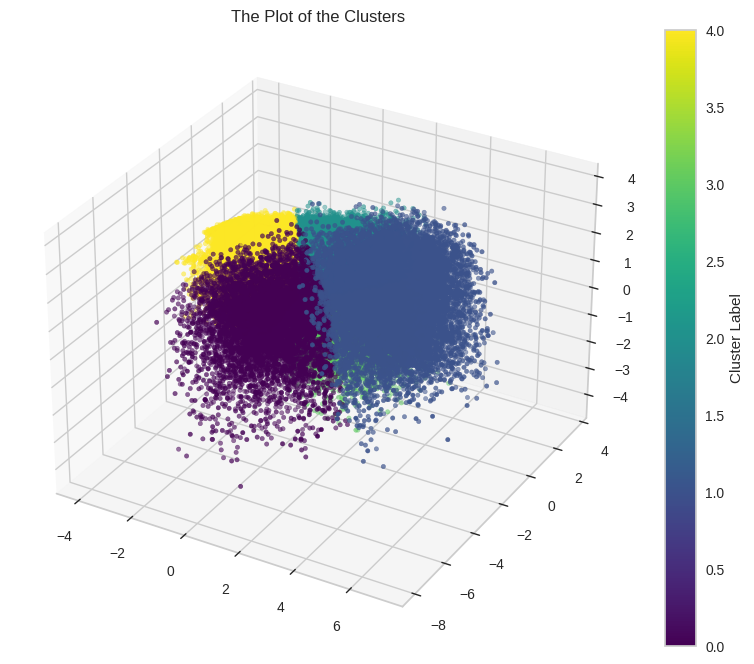

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]


cmap = plt.get_cmap("viridis")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, s=10, c=PCA_ds["Clusters"], marker='o', cmap=cmap)

plt.colorbar(scatter, label="Cluster Label")

ax.set_title("The Plot of the Clusters")
plt.show()

Interactive Plot

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    PCA_ds, x="col1", y="col2", z="col3",
    color="Clusters", size_max=10, opacity=0.8
)

fig.update_layout(title="Interactive 3D Clustering Visualization")
fig.show()


<ipython-input-38-7db5fecdf4b8>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-38-7db5fecdf4b8>:2: UserWarning:


The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.



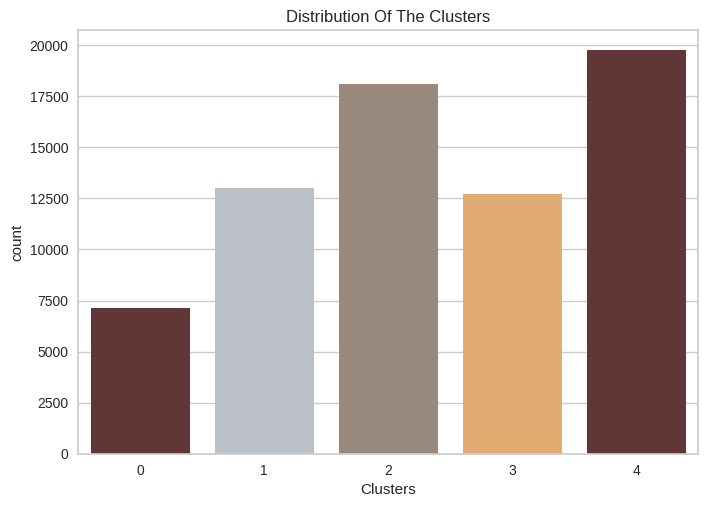

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()